In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load dataset

df = pd.read_csv("Africa_climate_change.csv")
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [47]:
print("Data Overview: \n")
print(df.head(), "\n")


Data Overview: 

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon 



In [49]:
# Checking for missing values and data types

print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64


In [53]:
# Cleaning the data

# Converting DATE column to datetime
df["DATE"] = pd.to_datetime(df["DATE"].astype(str).str[:8], format="%Y%m%d")

# Filling missing TAVG using the mean of TMIN and TMAX when available
df["TAVG"] = df["TAVG"].fillna((df["TMIN"] + df["TMAX"]) / 2)

# Filling missing TMAX using TAVG and TMIN if available
df["TMAX"] = df["TMAX"].fillna(2 * df["TAVG"] - df["TMIN"])

# Filling missing TMIN using TAVG and TMAX if available
df["TMIN"] = df["TMIN"].fillna(2 * df["TAVG"] - df["TMAX"])

# Droping rows where both TMAX and TMIN are still missing
df = df.dropna(subset=["TMAX", "TMIN"], how="all")

# Replacing NaN with 0 (assuming missing means no rain)
df["PRCP"] = df["PRCP"].fillna(0)

df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,0.0,54.0,61.0,43.0,Tunisia
1,1980-01-01,0.0,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,0.0,50.0,55.0,43.0,Tunisia
4,1980-01-01,0.0,75.0,91.0,59.0,Cameroon


In [55]:
df.isnull().sum()

DATE       0
PRCP       0
TAVG       4
TMAX       2
TMIN       2
COUNTRY    0
dtype: int64

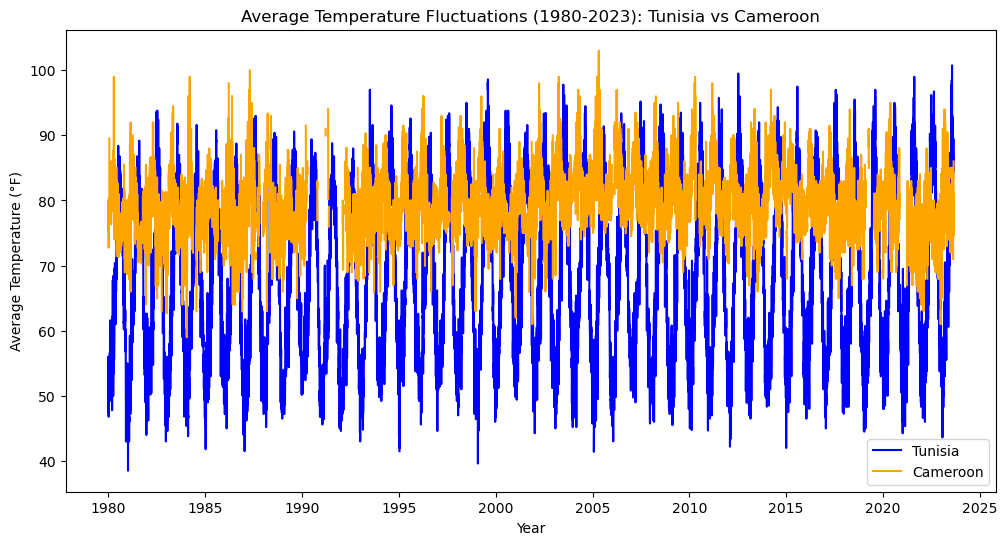

In [57]:
# 3. Plotting a line chart to show the average temperature fluctuations in Tunisia and Cameroon

# Filtering data for Tunisia and Cameroon
tuni_cam_df = df[df["COUNTRY"].isin(["Tunisia", "Cameroon"])]

# Grouping by DATE and COUNTRY to calculate the mean temperature per day
temp_trends = tuni_cam_df.groupby(["DATE", "COUNTRY"])["TAVG"].mean().unstack()

# Plotting the trends
plt.figure(figsize=(12, 6))
plt.plot(temp_trends.index, temp_trends["Tunisia"], label="Tunisia", color="Blue")
plt.plot(temp_trends.index, temp_trends["Cameroon"], label="Cameroon", color="orange")

# Formatting
plt.title("Average Temperature Fluctuations (1980-2023): Tunisia vs Cameroon")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(False)

# Show plot
plt.show()

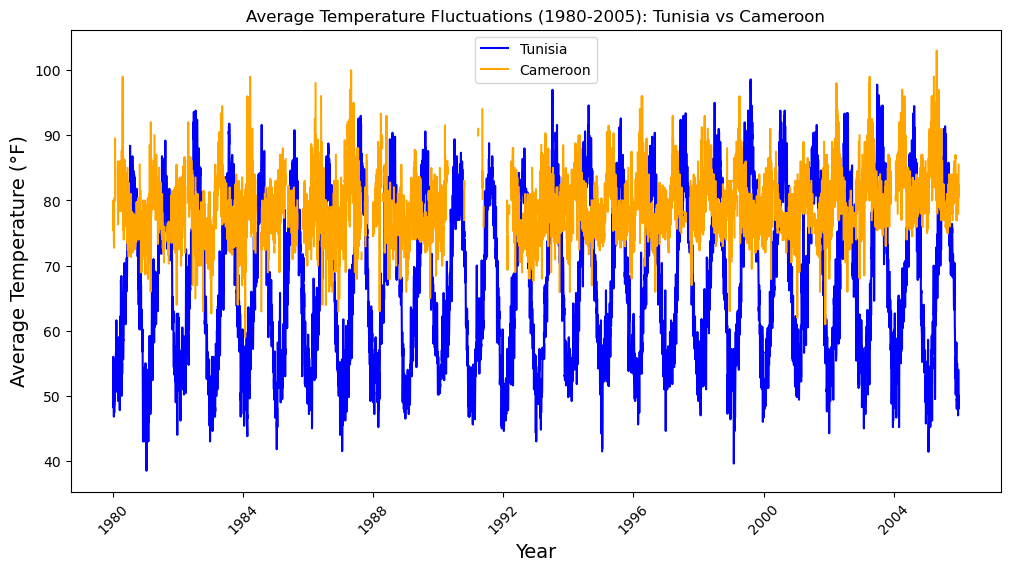

In [59]:
# 4. Zooming in to show the average temperature fluctuations in Tunisia and Cameroon between 1980 1nd 2005

# Filtering data between 1980 and 2005
zoomed_df = tuni_cam_df[(tuni_cam_df["DATE"] >= "1980-01-01") & (tuni_cam_df["DATE"] <= "2005-12-31")]

# Grouping by DATE and COUNTRY for mean temperature
temp_trends_zoomed = zoomed_df.groupby(["DATE", "COUNTRY"])["TAVG"].mean().unstack()

# Plotting zoomed-in trends
plt.figure(figsize=(12, 6))
plt.plot(temp_trends_zoomed.index, temp_trends_zoomed["Tunisia"], label="Tunisia", color="blue")
plt.plot(temp_trends_zoomed.index, temp_trends_zoomed["Cameroon"], label="Cameroon", color="orange")

# Formatting
plt.title("Average Temperature Fluctuations (1980-2005): Tunisia vs Cameroon")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Temperature (°F)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(False)

plt.show()

The graph above compares Tunisia and Cameroon’s temperature trends from 1980 to 2005.

Tunisia (Green Line): Shows a high seasonal variation, with temperatures fluctuating between ~40°F and ~90°F.

Cameroon (Orange Line): Has a narrower range with less seasonal variation, with temperatures mostly between ~60°F and ~100°F.

Conclusion:

Within the period (1980-2005), Tunisia had a more extreme temperature variation throughout the year, while Cameroon maintained a more stable and warmer climate.



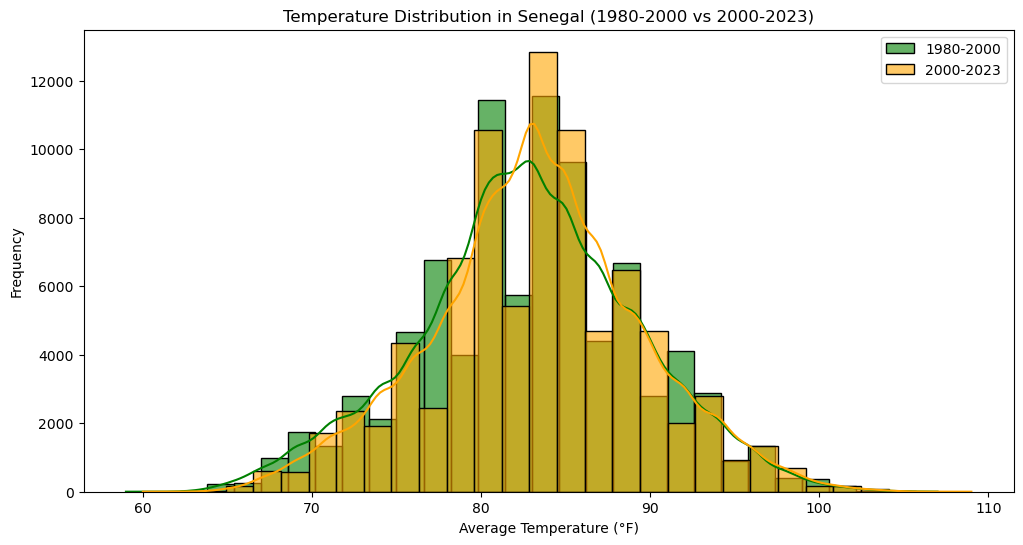

In [61]:
# 5. Histograms for Senegal (1980-2000 vs 2000-2023)

senegal = df[df['COUNTRY'] == "Senegal"]
senegal_1980_2000 = senegal[(senegal['DATE'] >= '1980-01-01') & (senegal['DATE'] <= '2000-12-31')]
senegal_2000_2023 = senegal[(senegal['DATE'] > '2000-12-31') & (senegal["DATE"] <= "2023-12-31")]

plt.figure(figsize=(12, 6))
sns.histplot(senegal_1980_2000['TAVG'], color='green', label='1980-2000', kde=True, bins=30, alpha=0.6)
sns.histplot(senegal_2000_2023['TAVG'], color='orange', label='2000-2023', kde=True, bins=30, alpha=0.6)
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Distribution in Senegal (1980-2000 vs 2000-2023)")
plt.legend()
plt.show()

The histogram above compares the distribution of temperatures in Senegal for two periods: 1980-2000 (Green) and 2000-2023 (Orange).

The orange (2000-2023) distribution is shifted slightly to the right, indicating an increase in average temperatures over time.

The peak frequency occurs around 80-85°F. Temperatures in the more recent period appear to even reach higher maximum values.

This suggests warming in Senegal over the past two decades, with more extreme temperature occurrences.




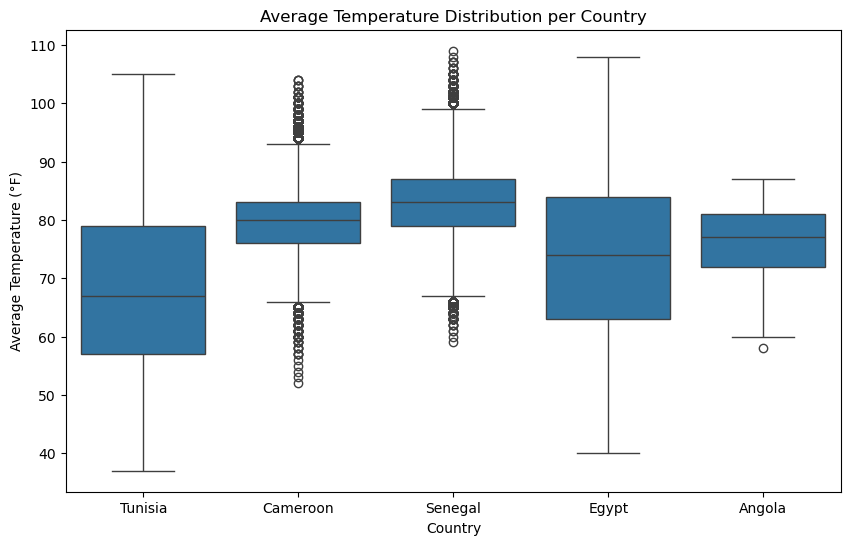

In [63]:
# 6. Best chart for Average Temperature per Country

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='COUNTRY', y='TAVG')
plt.xlabel("Country")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature Distribution per Country")
plt.show()


Average Temperature per Country:
COUNTRY
Senegal     83.013183
Cameroon    79.544423
Angola      76.416228
Egypt       73.845316
Tunisia     67.675703
Name: TAVG, dtype: float64


/var/folders/8k/nys88b0n7hj86fq0y90vt9fc0000gn/T/ipykernel_67311/1242659341.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette='coolwarm')


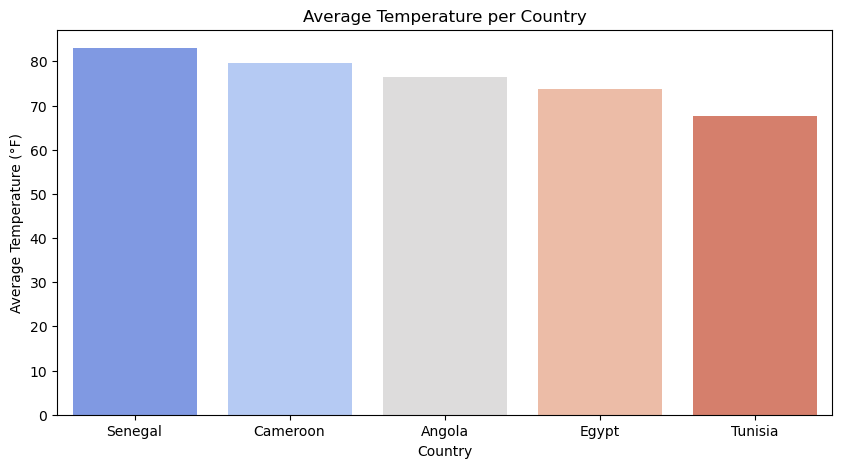

/var/folders/8k/nys88b0n7hj86fq0y90vt9fc0000gn/T/ipykernel_67311/1242659341.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette='coolwarm')



Average Temperature per Country:
COUNTRY
Senegal     83.013183
Cameroon    79.544423
Angola      76.416228
Egypt       73.845316
Tunisia     67.675703
Name: TAVG, dtype: float64


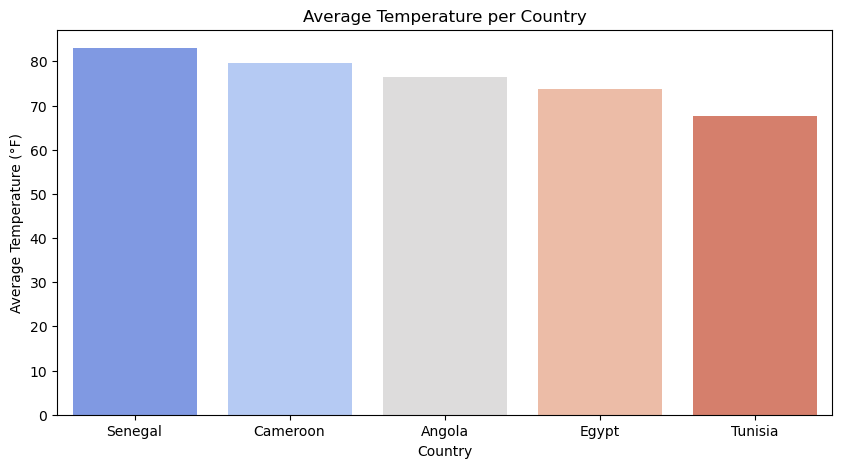

In [65]:
# Question 1: Which country has the highest average temperature in the dataset?

country_avg_temp = df.groupby("COUNTRY")["TAVG"].mean().sort_values(ascending=False)
print("\nAverage Temperature per Country:")
print(country_avg_temp)

# Visualizing the highest average temperature
plt.figure(figsize=(10, 5))
sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette='coolwarm')
plt.xlabel("Country")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature per Country")
plt.show()# Question 1: Which country has the highest average temperature in the dataset?

country_avg_temp = df.groupby("COUNTRY")["TAVG"].mean().sort_values(ascending=False)
print("\nAverage Temperature per Country:")
print(country_avg_temp)

# Visualizing the highest average temperature
plt.figure(figsize=(10, 5))
sns.barplot(x=country_avg_temp.index, y=country_avg_temp.values, palette='coolwarm')
plt.xlabel("Country")
plt.ylabel("Average Temperature (°F)")
plt.title("Average Temperature per Country")
plt.show()

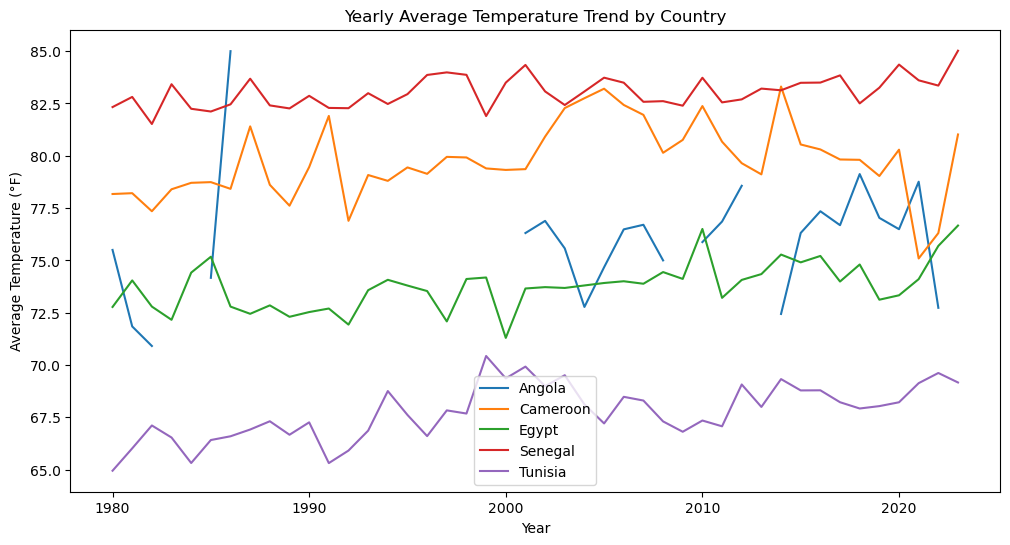

In [67]:
# Question 2: Has the average temperature increased over time in each country?

# Grouping data by year and country
df["YEAR"] = df["DATE"].dt.year
yearly_avg_temp = df.groupby(["YEAR", "COUNTRY"])["TAVG"].mean().unstack()

# Plotting trends
plt.figure(figsize=(12, 6))
for country in yearly_avg_temp.columns:
    plt.plot(yearly_avg_temp.index, yearly_avg_temp[country], label=country)

plt.title("Yearly Average Temperature Trend by Country")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()

plt.show()